In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

Prepare dirs

In [3]:
data_dir = "../cell_images"
parasitized_dir = os.path.join(data_dir, "Parasitized")
uninfected_dir = os.path.join(data_dir, "Uninfected")

print(f"Parasitized directory: {parasitized_dir}")
print(f"Uninfected direcotry: {uninfected_dir}")

Parasitized directory: ../cell_images/Parasitized
Uninfected direcotry: ../cell_images/Uninfected


Select Samples

In [4]:
parasitized_samples = random.sample(os.listdir(parasitized_dir),5)
uninfected_samples = random.sample(os.listdir(uninfected_dir), 5)

Display parasitized cells

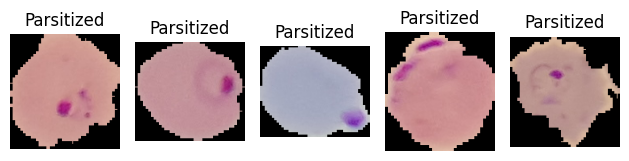

In [5]:
for i, image_name in enumerate(parasitized_samples):
  img_path = os.path.join(parasitized_dir, image_name)
  img = Image.open(img_path)
  plt.subplot(1, 5, i + 1)
  plt.imshow(img)
  plt.title("Parsitized")
  plt.axis("off")
plt.tight_layout()
plt.show()

Display uninfected cells

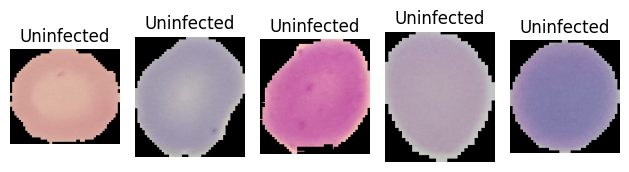

In [6]:
for i, image_name in enumerate(uninfected_samples):
  img_path = os.path.join(uninfected_dir, image_name)
  img = Image.open(img_path)
  plt.subplot(1, 5, i + 1)
  plt.imshow(img)
  plt.title("Uninfected")
  plt.axis("off")
plt.tight_layout()
plt.show()

Split dataset

In [11]:
import shutil
from pathlib import Path


def split_dataset(source_dir = "../cell_images", out_dir="../cell_images_split", train_ratio=0.8, seed= 42):
  random.seed(seed)
  classes = os.listdir(source_dir)

  for class_name in classes:
    images = os.listdir(os.path.join(source_dir, class_name))
    random.shuffle(images)

    split_index = int(len(images) * train_ratio)
    train_images = images[:split_index]
    test_images = images[split_index:]

    for split, split_images in [("train", train_images), ("test", test_images)]:
      split_class_dir = Path(out_dir) / split / class_name
      split_class_dir.mkdir(parents=True, exist_ok=True)

      for img_name in split_images:
        src = Path(source_dir) / class_name / img_name
        dst = split_class_dir / img_name
        shutil.copy(src, dst)
  print("✅ Dataset split completed!")

In [12]:
split_dataset()

✅ Dataset split completed!
